In [1]:
# Importing necesary libs
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv('subs.csv')

In [10]:
data.columns

Index(['id', 'name', 'hasCoordinatesDown', 'hasCoordinatesUp', 'level',
       'grandParentParentGraph', 'grandParentId', 'parentGraph', 'parentId',
       'parentName', 'color', 'range', 'value', 'radius', 'type',
       'facilities_ANC_SBA_IMM_periodid', 'facilities_ANC_SBA_IMM_periodname',
       'facilities_ANC_SBA_IMM_periodcode',
       'facilities_ANC_SBA_IMM_perioddescription',
       'facilities_ANC_SBA_IMM_organisationunitid',
       'facilities_ANC_SBA_IMM_organisationunitcode',
       'facilities_ANC_SBA_IMM_organisationunitdescription',
       'facilities_ANC_SBA_IMM_DPT/Hep+HiB3(DPT 3 Coverage)',
       'facilities_ANC_SBA_IMM_Pneumococal3 coverage',
       'facilities_ANC_SBA_IMM_4th Antenatal Care (ANC) Coverage (%)',
       'facilities_ANC_SBA_IMM_(%) of Deliveries conducted by Skilled Birth Attendants',
       'OBJECTID', 'ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2',
       'ID_3', 'NAME_3', 'ID_4', 'NAME_4', 'ID_5', 'NAME_5', 'TYPE_5',
       'ENGTYPE_

In [14]:
### selecting only 5 columns that we wish to work with
data2 = data.loc[:,['facilities_ANC_SBA_IMM_DPT/Hep+HiB3(DPT 3 Coverage)',
       'facilities_ANC_SBA_IMM_Pneumococal3 coverage',
       'facilities_ANC_SBA_IMM_4th Antenatal Care (ANC) Coverage (%)',
       'facilities_ANC_SBA_IMM_(%) of Deliveries conducted by Skilled Birth Attendants', 'NAME_5']]

In [15]:
data2.rename(columns={'facilities_ANC_SBA_IMM_4th Antenatal Care (ANC) Coverage (%)':'ANC','facilities_ANC_SBA_IMM_DPT/Hep+HiB3(DPT 3 Coverage)':'DPT','facilities_ANC_SBA_IMM_Pneumococal3 coverage':'PCV','facilities_ANC_SBA_IMM_(%) of Deliveries conducted by Skilled Birth Attendants':'SBA','NAME_5':'sublocations'},inplace=True)

In [16]:
data2.columns

Index(['DPT', 'PCV', 'ANC', 'SBA', 'sublocations'], dtype='object')

In [19]:
data2.shape

(151, 5)

In [30]:
data2.isnull()

,DPT,PCV,ANC,SBA,sublocations
0,False,False,False,False,False
1,True,True,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False
149,False,False,False,False,False


In [36]:
data2.dropna(subset=['DPT', 'PCV', 'ANC', 'SBA', 'sublocations'],how='any',inplace=True)

In [37]:
data2.shape

(140, 5)

In [48]:
data2.sublocations

0        Omia Mwalo
2      Malunga East
3         Onyinyore
4            Ngunya
5      East Migwena
           ...     
146           Usigu
147           Uyawi
148           Wagai
149         Kokwiri
150       Nyamninia
Name: sublocations, Length: 140, dtype: object

In [49]:
data2.corr()

,DPT,PCV,ANC,SBA
DPT,1.000000,0.996995,0.777958,0.532260
PCV,0.996995,1.000000,0.779074,0.532558
ANC,0.777958,0.779074,1.000000,0.723257
SBA,0.532260,0.532558,0.723257,1.000000


array([[<AxesSubplot:title={'center':'DPT'}>,
        <AxesSubplot:title={'center':'PCV'}>],
       [<AxesSubplot:title={'center':'ANC'}>,
        <AxesSubplot:title={'center':'SBA'}>]], dtype=object)

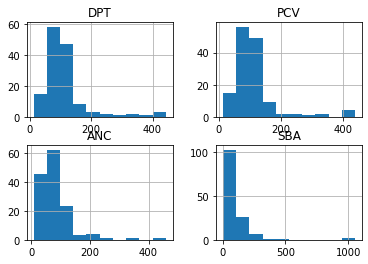

In [50]:
data2.hist()

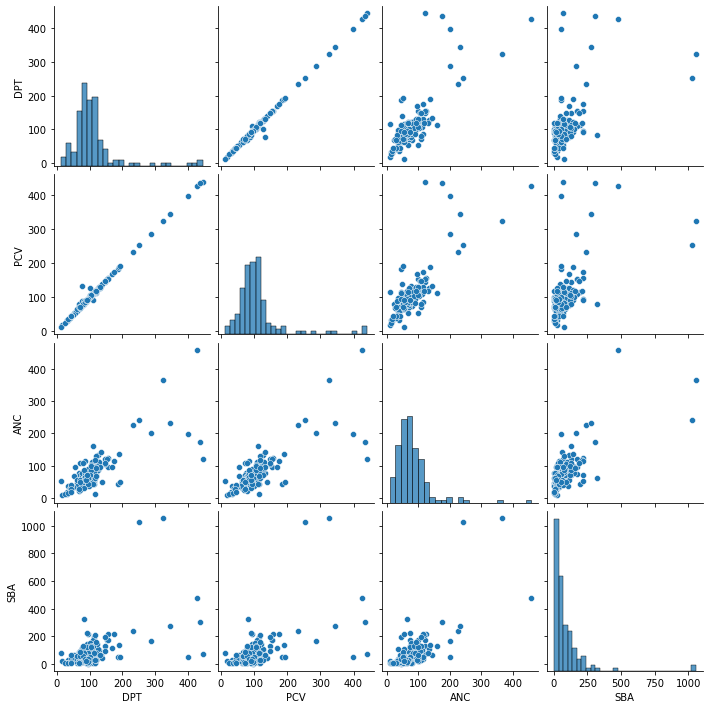

In [51]:
sns.pairplot(data2)

In [55]:
data2

,DPT,PCV,ANC,SBA,sublocations
0,66.8,66.8,65.1,83.1,Omia Mwalo
2,155.5,155.5,123.7,214.9,Malunga East
3,426.8,426.8,459.0,476.9,Onyinyore
4,98.2,98.2,90.0,131.1,Ngunya
5,112.2,115.9,102.1,22.8,East Migwena
...,...,...,...,...,...
146,147.1,147.1,108.8,190.8,Usigu
147,118.2,118.2,91.9,155.0,Uyawi
148,287.0,287.0,200.4,163.3,Wagai
149,90.7,90.7,55.7,17.6,Kokwiri


In [60]:
data2.sublocations.value_counts()

Ugunja          4
Katwenga        4
Barding         3
Karapul         3
Sega            3
               ..
Ramunde         1
Mahaya          1
BAR-KOWINO      1
Bumala          1
Malunga East    1
Name: sublocations, Length: 94, dtype: int64

In [63]:
sublocations=data2.groupby('sublocations')

In [64]:
sublocations

In [65]:
print(sublocations)

In [69]:
for sublocations:
    print(sublocations)
 

SyntaxError: invalid syntax (<ipython-input-69-d3fd641a60d1>, line 1)

In [70]:
sublocations.max()

,DPT,PCV,ANC,SBA
sublocations,,,,
Anyiko,90.1,90.1,47.1,24.9
Asayi,34.3,34.3,37.5,23.4
BAR-AGULU,95.1,95.7,45.9,1.1
BAR-KOWINO,443.6,440.2,119.7,69.8
Bar Kanyango,94.2,94.2,44.3,36.7
...,...,...,...,...
Utonga,112.4,112.4,99.7,97.1
Uyawi,118.2,118.2,91.9,155.0
Wagai,287.0,287.0,200.4,163.3
